In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [157]:
data = pd.read_csv(r"C:\Users\abhin\OneDrive\Documents\Project\Employee_Salary_Prediction\adult 3.csv")

In [158]:
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [159]:
data.tail(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [160]:
data.shape

(48842, 15)

In [161]:
data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [162]:
data.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [163]:
data.workclass.replace({'?':'Others'},inplace=True)
data.workclass.value_counts()

C:\Users\abhin\AppData\Local\Temp\ipykernel_1420\1566798182.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.workclass.replace({'?':'Others'},inplace=True)


workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [164]:
data.occupation.value_counts()


occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [165]:
data.occupation.replace({'?':'Others'},inplace=True)

C:\Users\abhin\AppData\Local\Temp\ipykernel_1420\2426378524.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.occupation.replace({'?':'Others'},inplace=True)


In [166]:
data.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Others               2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [167]:
data=data[data['workclass']!='Without-pay']
data=data[data['workclass']!='Never-worked']
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64


In [168]:
data.relationship.value_counts()


relationship
Husband           19708
Not-in-family     12582
Own-child          7566
Unmarried          5123
Wife               2327
Other-relative     1505
Name: count, dtype: int64

In [169]:
data.gender.value_counts()

gender
Male      32629
Female    16182
Name: count, dtype: int64

In [170]:
data.education.value_counts()

education
HS-grad         15768
Some-college    10873
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1809
Assoc-acdm       1599
10th             1387
7th-8th           952
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [171]:
data.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6111
Exec-managerial      6085
Adm-clerical         5608
Sales                5503
Other-service        4921
Machine-op-inspct    3020
Others               2799
Transport-moving     2354
Handlers-cleaners    2070
Farming-fishing      1482
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [172]:
data.relationship.value_counts()

relationship
Husband           19708
Not-in-family     12582
Own-child          7566
Unmarried          5123
Wife               2327
Other-relative     1505
Name: count, dtype: int64

In [173]:
data.race.value_counts()

race
White                 41736
Black                  4681
Asian-Pac-Islander     1518
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

In [174]:
data.shape

(48811, 15)

In [175]:
##OUTLINER DETECTION

{'whiskers': [<matplotlib.lines.Line2D at 0x20ce1c7a0c0>,
 'caps': [<matplotlib.lines.Line2D at 0x20ce1c7a690>,
 'boxes': [<matplotlib.lines.Line2D at 0x20ce060ec00>],
 'medians': [<matplotlib.lines.Line2D at 0x20ce1c7ac30>],
 'fliers': [<matplotlib.lines.Line2D at 0x20ce1c7af30>],
 'means': []}

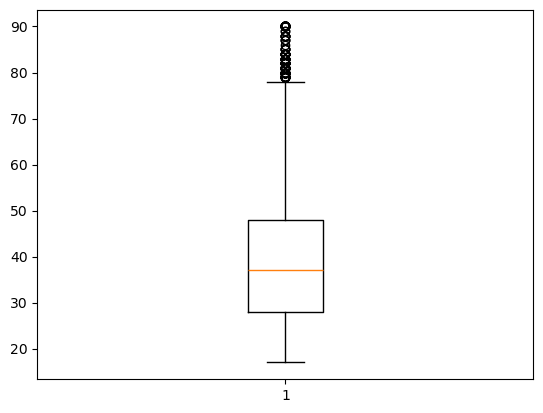

In [176]:
plt.boxplot(data['age'])

In [177]:
data=data[(data['age']<=75)&(data['age']>=17)]

{'whiskers': [<matplotlib.lines.Line2D at 0x20ce1cd6fc0>,
 'caps': [<matplotlib.lines.Line2D at 0x20ce1cd73e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20ce1cd68a0>],
 'medians': [<matplotlib.lines.Line2D at 0x20ce1cd7920>],
 'fliers': [<matplotlib.lines.Line2D at 0x20ce1cd7bc0>],
 'means': []}

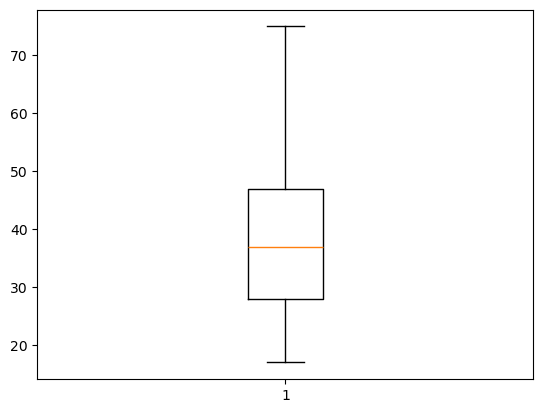

In [178]:
plt.boxplot(data['age'])

In [179]:
data.shape

(48438, 15)

{'whiskers': [<matplotlib.lines.Line2D at 0x20ce1d460f0>,
 'caps': [<matplotlib.lines.Line2D at 0x20ce1d46600>,
 'boxes': [<matplotlib.lines.Line2D at 0x20ce1d45f40>],
 'medians': [<matplotlib.lines.Line2D at 0x20ce1d46b40>],
 'fliers': [<matplotlib.lines.Line2D at 0x20ce1d46e10>],
 'means': []}

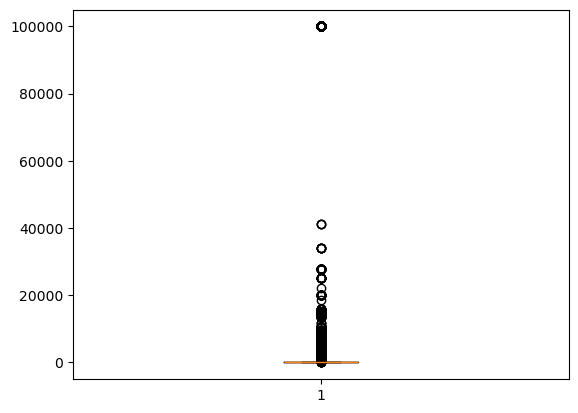

In [180]:
plt.boxplot(data['capital-gain'])

{'whiskers': [<matplotlib.lines.Line2D at 0x20ce1d11490>,
 'caps': [<matplotlib.lines.Line2D at 0x20ce2fe8950>,
 'boxes': [<matplotlib.lines.Line2D at 0x20ce2f8fdd0>],
 'medians': [<matplotlib.lines.Line2D at 0x20ce2fe8f20>],
 'fliers': [<matplotlib.lines.Line2D at 0x20ce2fe9190>],
 'means': []}

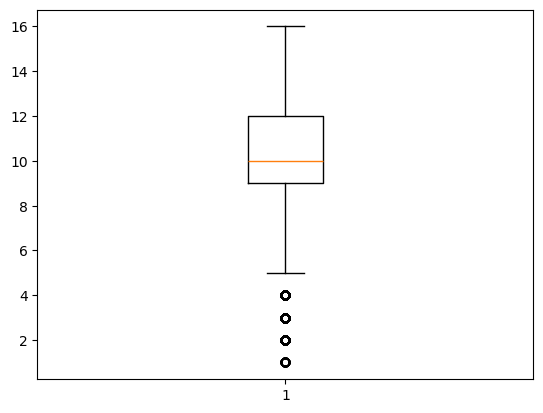

In [181]:
plt.boxplot(data['educational-num'])

In [182]:
data=data[(data['educational-num']<=16)&(data['educational-num']>=5)]

In [183]:
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x20ce301fb00>,
 'caps': [<matplotlib.lines.Line2D at 0x20ce30540b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20ce301f800>],
 'medians': [<matplotlib.lines.Line2D at 0x20ce30545f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20ce3054860>],
 'means': []}

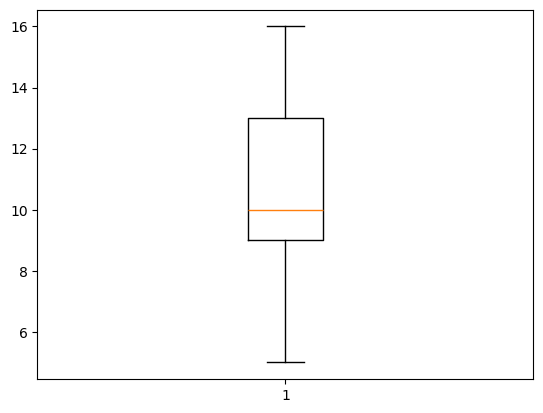

In [184]:
plt.boxplot(data['educational-num'])

{'whiskers': [<matplotlib.lines.Line2D at 0x20ce1d79ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x20ce1d7a480>,
 'boxes': [<matplotlib.lines.Line2D at 0x20ce1d79c10>],
 'medians': [<matplotlib.lines.Line2D at 0x20ce1d7aa20>],
 'fliers': [<matplotlib.lines.Line2D at 0x20ce1d7ad20>],
 'means': []}

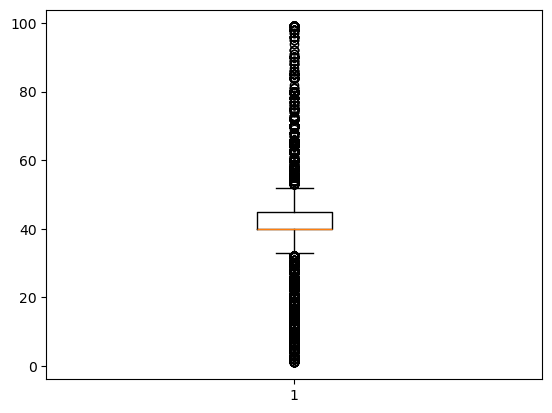

In [185]:
plt.boxplot(data['hours-per-week'])

In [186]:
data.shape

(46720, 15)

In [187]:
data=data.drop(columns=['education'])

In [188]:
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Others,103497,10,Never-married,Others,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [189]:
encoder=LabelEncoder()

In [190]:
data['workclass']=encoder.fit_transform(data['workclass'])
data['marital-status']=encoder.fit_transform(data['marital-status'])
data['occupation']=encoder.fit_transform(data['occupation'])
data['relationship']=encoder.fit_transform(data['relationship'])
data['race']=encoder.fit_transform(data['race'])
data['gender']=encoder.fit_transform(data['gender'])
data['native-country']=encoder.fit_transform(data['native-country'])

In [191]:
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,7,4,6,3,2,1,0,0,40,39,<=50K
1,38,3,89814,9,2,4,0,4,1,0,0,50,39,<=50K
2,28,1,336951,12,2,11,0,4,1,0,0,40,39,>50K
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39,>50K
4,18,2,103497,10,4,8,3,4,0,0,0,30,39,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,2,13,5,4,0,0,0,38,39,<=50K
48838,40,3,154374,9,2,6,0,4,1,0,0,40,39,>50K
48839,58,3,151910,9,6,0,4,4,0,0,0,40,39,<=50K
48840,22,3,201490,9,4,0,3,4,1,0,0,20,39,<=50K


In [192]:
x=data.drop(columns=['income'])

In [193]:
y=data['income']

In [194]:
x

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,3,226802,7,4,6,3,2,1,0,0,40,39
1,38,3,89814,9,2,4,0,4,1,0,0,50,39
2,28,1,336951,12,2,11,0,4,1,0,0,40,39
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39
4,18,2,103497,10,4,8,3,4,0,0,0,30,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,2,13,5,4,0,0,0,38,39
48838,40,3,154374,9,2,6,0,4,1,0,0,40,39
48839,58,3,151910,9,6,0,4,4,0,0,0,40,39
48840,22,3,201490,9,4,0,3,4,1,0,0,20,39


In [195]:
y

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 46720, dtype: object